# Projet d'Analyse des Données

## Introduction

Salut tout le monde ! Je suis **Aymen RAMI** et aujourd'hui, je vais plonger dans un projet super intéressant : analyser comment les gens utilisent les applications mobiles. On va jouer avec des chiffres comme la durée d'utilisation (`Usage`), le nombre de notifications reçues (`Notifications`) et le nombre de fois où l'application a été ouverte (`Times opened`). 

Le but ? Découvrir si les notifications poussent vraiment les gens à ouvrir leur application plus souvent, si plus de temps d'utilisation veut dire plus de notifications, et quelles sont les journées les plus populaires pour ouvrir l'application. 

Bref, on va essayer de comprendre ce qui pousse les gens à devenir accros à leurs applis (ou pas !). Et qui sait, on pourrait même découvrir des secrets cachés dans ces données !

## Illustration

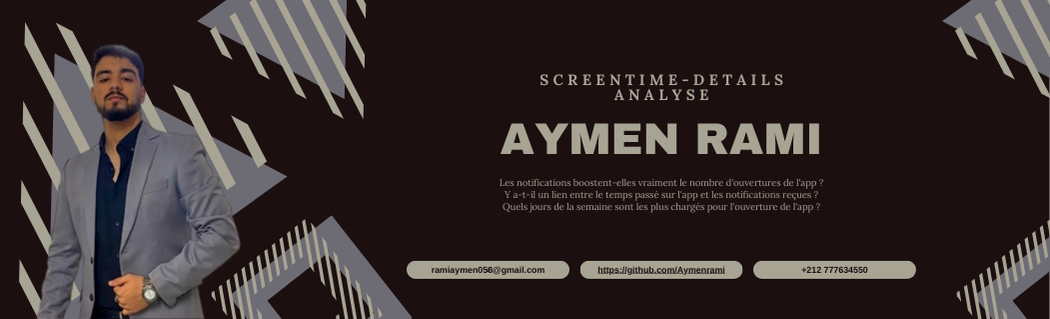


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [34]:
df = pd.read_excel('ScreentimeDataTronform.xlsx')
df.head()

,Date,Usage,Notifications,Times opened,App,DayOfWeek,Nom du jour,DayType
0,2022-08-26,38,70,49,Instagram,4,vendredi,NormalDay
1,2022-08-27,39,43,48,Instagram,5,samedi,WeekEnd
2,2022-08-28,64,231,55,Instagram,6,dimanche,WeekEnd
3,2022-08-29,14,35,23,Instagram,0,lundi,NormalDay
4,2022-08-30,3,19,5,Instagram,1,mardi,NormalDay


In [35]:
df[['Usage','Notifications','Times opened']].describe()

,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


# Résumé des stats d'utilisation d'un utilisateur sur l'appli

Alors, voici ce qu'on peut dire sur **ce fameux utilisateur** :

## 1. **Usage (temps passé sur l'appli)**
- **Moyenne** : Notre utilisateur passe en moyenne **65 minutes** par jour sur l'appli. Pas mal, une petite heure à se balader dessus !
- **Écart-type** : Par contre, il est pas très régulier. Un jour il passe **2 minutes**, un autre il tape **4 heures** ! Un vrai yo-yo avec un écart de **58 minutes**.
- **Min-Max** : Le jour où il a fait le plus vite, c’était **1 minute**, et quand il s’y met vraiment, il peut rester jusqu'à **244 minutes** (presque 4 heures !).
- **Médiane** : La moitié du temps, il reste **58,5 minutes**. En gros, ça dépend de son mood !
- **IQR** : En moyenne, il passe entre **17,5 minutes** et **90,5 minutes** sur l'appli. Ça reste raisonnable, mais il a ses moments d’intensité.

---
---

## 2. **Notifications**
- **Moyenne** : Il reçoit environ **118 notifications** par jour. L'appli aime bien le harceler, faut croire !
- **Écart-type** : Ça varie pas mal aussi, avec un écart de **97 notifications**. Parfois, il est tranquille, d'autres fois il doit en avoir marre !
- **Min-Max** : Le jour où il a reçu le moins d'alertes, c’était **8**, et le pire qu'il a vécu, c’est **405 notifications**. Ça doit vibrer toutes les deux secondes chez lui !
- **IQR** : La majorité du temps, il reçoit entre **25,75** et **188,25 notifications**. C’est quand même beaucoup, non ?

---
---

## 3. **Times opened (nombre d'ouvertures)**
- **Moyenne** : Il ouvre l'appli environ **61 fois** par jour. Franchement, c'est pas mal, ça doit être son appli préférée !
- **Écart-type** : Là aussi, ça fluctue avec un écart de **43 ouvertures**. Certains jours, c’est juste pour vérifier, d'autres jours, il doit être collé à l'écran.
- **Min-Max** : Le jour le plus calme, il n'a ouvert l'appli que **2 fois**, mais un autre jour, il l'a ouverte **192 fois** ! On dirait qu’il était en mission !
- **IQR** : D’habitude, il ouvre l'appli entre **23,5 fois** et **90 fois** par jour. En gros, il est assez accro !

---
---

Bref, notre utilisateur a une relation bien spéciale avec son appli. Un coup il est cool, un coup il devient accro... mais bon, on le comprend !
is bon, on le comprend !


# Inspection des données : Un coup d'œil rapide !

Bon, alors on a regardé les données de plus près, voilà ce qu'on a trouvé :

## 1. **Des colonnes vides ?**
```python
df.isna().sum()



In [56]:
df.isna().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
DayOfWeek        0
Nom du jour      0
DayType          0
dtype: int64

## Résultat :
# Aucune colonne vide ! 
- Notre dataset est nickel chrome, pas besoin de s'inquiéter des valeurs manquantes

# 2. Valeurs dupliquées
## Deuxième vérification, est-ce qu'on a des doublons ?

In [57]:
df.duplicated().sum()

0

# Résultat :
## 0 doublons ! 🙌
- Pas de données répétées, tout est unique et bien structuré. Franchement, c’est rare qu’on ait une data aussi clean dès le départ !



# 3. Infos sur les colonnes
## Un dernier coup d’œil sur les types de données et quelques statistiques générales :

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           54 non-null     datetime64[ns]
 1   Usage          54 non-null     int64         
 2   Notifications  54 non-null     int64         
 3   Times opened   54 non-null     int64         
 4   App            54 non-null     object        
 5   DayOfWeek      54 non-null     int64         
 6   Nom du jour    54 non-null     object        
 7   DayType        54 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.5+ KB


## Détails des colonnes :
- On a *54* lignes et *8* colonnes.
- Date : Format (`datetime64`), parfait pour les jours.
- Usage, Notifications, Times opened, DayOfWeek : Des (`int64`), donc des entiers.
- App, Nom du jour, DayType : (`Des object`), donc des chaînes de caractères.
# Mémoire utilisée :
- La mémoire est de 3.5 KB, très léger. Tout est prêt pour l’analyse !




---
# les histogram


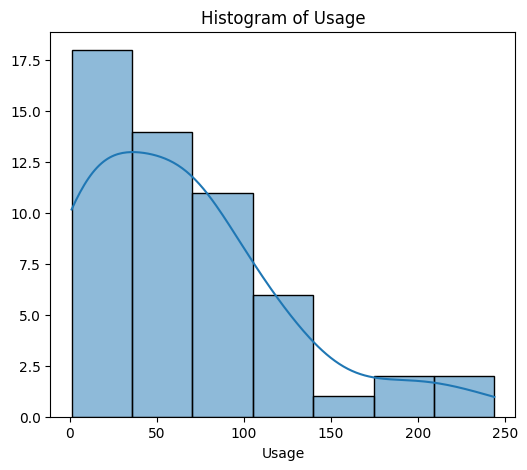

In [43]:
plt.figure(figsize = (6,5))
sns.histplot(data = df , x='Usage',kde=True)
plt.title('Histogram of Usage')
plt.xlabel('Usage')
plt.ylabel('')
plt.show()

In [48]:
stat , p_value = stats.shapiro(df['Usage'])
print(f'Statistic: {stat}, P-value: {p_value}')
alpha = 0.05
if p_value > alpha:
    print("اUsage suive un normal distrubution (ne rejecter pas H0)")
else:
    print("اUsage ne suive pas un normal distrubition (Rejecter H0)")

Statistic: 0.8908424613607382, P-value: 0.00013915878822707187
اUsage ne suive pas un normal distrubition (Rejecter H0)


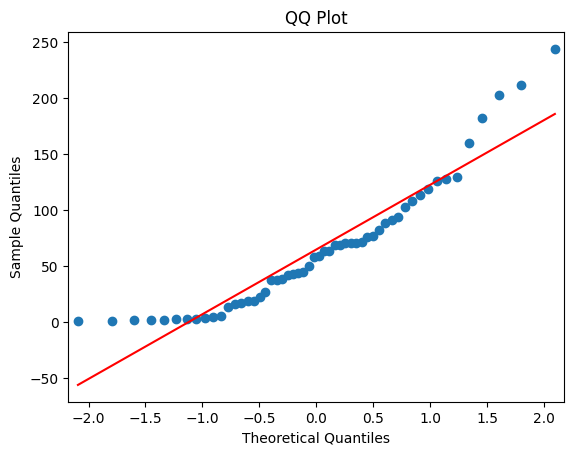

In [51]:
# رسم QQ plot
sm.qqplot(df['Usage'], line='s')
plt.title('QQ Plot')
plt.show()